In [ ]:
!pip install xgboost

In [206]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as ac
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc
import lightgbm
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate

In [ ]:
df1 = pd.read_csv('/content/features_3_sec.csv')

In [ ]:
df1.shape

(9990, 60)

In [ ]:
df1.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df = df1.drop(['filename', 'length'], axis=1)

In [ ]:
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
print(df.isnull().sum())

chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var     

In [ ]:
df.dtypes

chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var           

In [ ]:
df.tail()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,3462.042142,1.517016e+06,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [ ]:
x = df.iloc[:, 0:57]
y = df.iloc[:, 57]

In [ ]:
x.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [ ]:
y.head()

0    blues
1    blues
2    blues
3    blues
4    blues
Name: label, dtype: object

In [ ]:
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, train_size = 0.8, random_state = 675)

In [ ]:
ss = StandardScaler()

In [ ]:
x1_train = ss.fit_transform(x_train)
x1_test = ss.fit_transform(x_test)

In [ ]:
x3_train = x1_train
x3_test = x1_test

In [ ]:
pca = PCA(n_components = 57)
x2_train = pca.fit_transform(x3_train)
x2_test = pca.fit_transform(x3_test)

In [196]:
table = []
l0 = ['Model', 'Simple model', 'With PCA', 'With LDA']
table.append(l0)

#**1.Lightgbm**

In [ ]:
lgbm1 = lightgbm.LGBMClassifier()

In [ ]:
lgbm1.fit(x_train, y_train)
lg_y1 = lgbm1.predict(x_test)
print(ac(y_test, lg_y1))

0.8998998998998999


In [ ]:
print(confusion_matrix(y_test, lg_y1))

[[183   1   6   0   2   2   3   0   3   1]
 [  0 182   0   0   0   1   0   0   0   2]
 [  7   0 169   1   2   8   0   2   2   1]
 [  4   0   1 166   5   1   3   6   1   6]
 [  1   1   1   5 179   2   3   4   6   3]
 [  2   5   6   0   0 195   0   0   0   1]
 [  1   1   1   1   2   1 183   0   0   7]
 [  0   0   7   2   6   0   0 180   6   2]
 [  2   0   5   3   3   3   0   4 185   0]
 [  6   2   3   6   0   2   9   0   4 176]]


In [169]:
print(classification_report(y_test, lg_y1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       201
           1       0.95      0.98      0.97       185
           2       0.85      0.88      0.86       192
           3       0.90      0.86      0.88       193
           4       0.90      0.87      0.89       205
           5       0.91      0.93      0.92       209
           6       0.91      0.93      0.92       197
           7       0.92      0.89      0.90       203
           8       0.89      0.90      0.90       205
           9       0.88      0.85      0.86       208

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x_train,y_train)
x_train2= lda.transform(x_train)
x_test2= lda.transform(x_test)

In [ ]:
model1 = lightgbm.LGBMClassifier()
model1.fit(x_train2, y_train)
y_pred1 = model1.predict(x_test2)

In [ ]:
accu1=ac(y_test,y_pred1)
print(accu1)

0.4469469469469469


**ROC**

Text(0.5, 0, 'False Positive Rate')

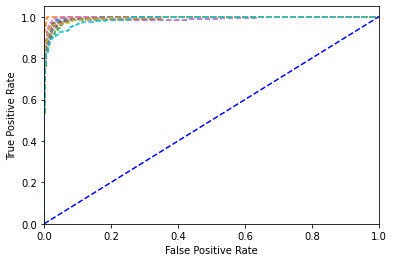

In [ ]:
w1 = lgbm1.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w1[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

PCA

In [170]:
P1 = lightgbm.LGBMClassifier()
P1.fit(x2_train, y_train)

LGBMClassifier()

In [171]:
Q1 = P1.predict(x2_test)

In [172]:
print(ac(y_test, Q1))

0.42842842842842843


In [197]:
l1 = ['Lightgbm Classfier', ac(y_test, lg_y1),ac(y_test, Q1), ac(y_test,y_pred1)]
table.append(l1)

#**2.XGBClassiifier**

In [ ]:
xgb1 = xgboost.XGBClassifier()
xgb1.fit(x_train, y_train)
xg_y1 = xgb1.predict(x_test)

In [ ]:
ac1 = ac(y_test, xg_y1)

In [ ]:
print(ac1)

0.8033033033033034


In [ ]:
print(confusion_matrix(y_test, xg_y1))

[[161   1  12   1   4   6  10   0   4   2]
 [  0 177   0   0   0   6   0   0   0   2]
 [ 10   1 146   4   2  13   1   5   4   6]
 [  3   0   4 146  12   2   4  10   5   7]
 [  5   1   2   5 156   2   6  11  15   2]
 [  6   8  13   0   0 181   0   0   1   0]
 [  1   1   2   2   3   1 178   0   1   8]
 [  0   0  15  10   7   3   0 157   5   6]
 [  6   0   9   6   8   3   1   9 159   4]
 [ 10   2   7  15   1   7  13   1   8 144]]


In [ ]:
print(classification_report(y_test, xg_y1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       201
           1       0.93      0.96      0.94       185
           2       0.70      0.76      0.73       192
           3       0.77      0.76      0.76       193
           4       0.81      0.76      0.78       205
           5       0.81      0.87      0.84       209
           6       0.84      0.90      0.87       197
           7       0.81      0.77      0.79       203
           8       0.79      0.78      0.78       205
           9       0.80      0.69      0.74       208

    accuracy                           0.80      1998
   macro avg       0.80      0.80      0.80      1998
weighted avg       0.80      0.80      0.80      1998



**ROC**

Text(0.5, 0, 'False Positive Rate')

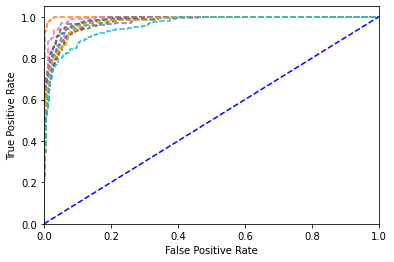

In [ ]:
w2 = xgb1.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w2[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x_train,y_train)
x_train3= lda.transform(x_train)
x_test3= lda.transform(x_test)

In [ ]:
model2 = xgboost.XGBClassifier()
model2.fit(x_train3, y_train)
y_pred2 = model1.predict(x_test3)

In [ ]:
accu2=ac(y_test,y_pred2)
print(accu2)

0.4469469469469469


 PCA

In [173]:
P2 = xgboost.XGBClassifier()
P2.fit(x2_train, y_train)

XGBClassifier(objective='multi:softprob')

In [174]:
Q2 = P2.predict(x2_test)

In [175]:
print(ac(y_test, Q2))

0.43243243243243246


In [198]:
l2 = ['Xgboost Classifier', ac(y_test, xg_y1), ac(y_test, Q2), ac(y_test,y_pred2)]
table.append(l2)

#**3.KNN Classificatiion**

In [ ]:
n = []
accuracy = []
for i in range(1, 13):
  m2 = KNeighborsClassifier(n_neighbors = i)
  cv = KFold(n_splits=5, random_state=1, shuffle=True)
  scores = cross_val_score(m2, x1_train, y_train, scoring='accuracy', cv = cv, n_jobs= -1)
  n.append(i)
  accuracy.append(statistics.mean(abs(scores)))

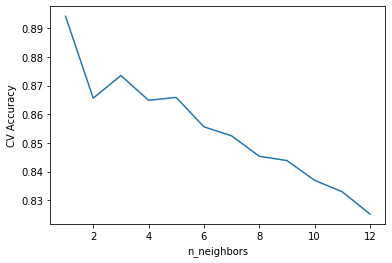

In [ ]:
plt.plot(n, accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('CV Accuracy')
plt.show()

In [ ]:
error_rate = []
n = []
for i in range(1, 13):
  m2 = KNeighborsClassifier(n_neighbors = i)
  m2.fit(x1_train, y_train)
  pred_i = m2.predict(x1_test)
  error_rate.append(np.mean(pred_i != y_test))
  n.append(i)

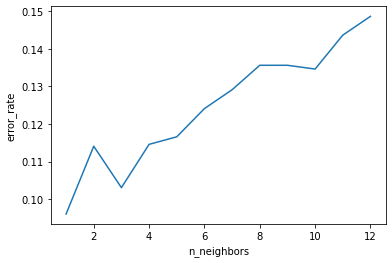

In [ ]:
plt.plot(n, error_rate)
plt.xlabel('n_neighbors')
plt.ylabel('error_rate')
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x1_train, y_train)
knn_y1 = knn1.predict(x1_test)

In [ ]:
print(ac(y_test, knn_y1))

0.8968968968968969


In [ ]:
print(confusion_matrix(y_test, knn_y1))

[[196   1   2   0   0   0   0   0   2   0]
 [  0 174   1   0   0  10   0   0   0   0]
 [  7   2 168   4   0   1   0   1   7   2]
 [  2   1   6 175   3   0   1   1   0   4]
 [  0   2   6   5 179   2   1   5   5   0]
 [  6  10  12   1   0 178   0   2   0   0]
 [  0   0   0   2   2   1 188   0   0   4]
 [  1   1   5   8   5   5   0 172   4   2]
 [  2   1   3   3   0   1   0   2 193   0]
 [  4   2  10  10   2   3   3   2   3 169]]


In [ ]:
print(classification_report(y_test, knn_y1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.90      0.94      0.92       185
           2       0.79      0.88      0.83       192
           3       0.84      0.91      0.87       193
           4       0.94      0.87      0.90       205
           5       0.89      0.85      0.87       209
           6       0.97      0.95      0.96       197
           7       0.93      0.85      0.89       203
           8       0.90      0.94      0.92       205
           9       0.93      0.81      0.87       208

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



**ROC**

Text(0.5, 0, 'False Positive Rate')

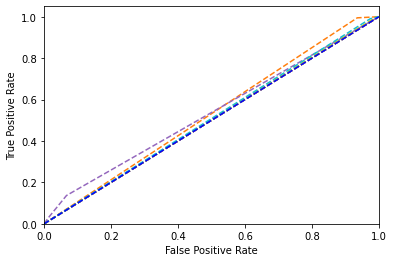

In [ ]:
w3 = knn1.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w3[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x_train,y_train)
x_train4= lda.transform(x_train)
x_test4= lda.transform(x_test)


In [ ]:
model3 = KNeighborsClassifier()
model3.fit(x_train4, y_train)
y_pred3 = model1.predict(x_test4)

In [ ]:
accu3=ac(y_test,y_pred3)
print(accu3)

0.4469469469469469


PCA

In [176]:
P3 = KNeighborsClassifier()
P3.fit(x2_train, y_train)

KNeighborsClassifier()

In [177]:
Q3 = P3.predict(x2_test)

In [178]:
print(ac(y_test, Q3))

0.3838838838838839


In [199]:
l3 = ['KNN Classifier', ac(y_test, knn_y1), ac(y_test, Q3), ac(y_test,y_pred3)]
table.append(l3)

#**4.Random Forest Classifier**

In [ ]:
rfc1 = rfc()
rfc1.fit(x_train, y_train)
rfc_y1 = rfc1.predict(x_test)

In [ ]:
print(ac(y_test, rfc_y1))

0.8623623623623624


In [ ]:
print(confusion_matrix(y_test, rfc_y1))

[[178   1   4   2   0   3   9   0   4   0]
 [  0 180   3   0   0   1   0   0   1   0]
 [  7   3 158   4   0   8   2   5   4   1]
 [  1   1   3 163   8   0   3   5   3   6]
 [  2   1   1   6 173   1   2  11   4   4]
 [  5   7   6   1   0 189   0   0   1   0]
 [  1   1   0   0   3   0 187   0   1   4]
 [  0   0   8   8   6   2   0 172   4   3]
 [  2   0   8   2   8   4   0   7 171   3]
 [  4   0  15   8   0   5  16   0   8 152]]


In [ ]:
print(classification_report(y_test, rfc_y1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       201
           1       0.93      0.97      0.95       185
           2       0.77      0.82      0.79       192
           3       0.84      0.84      0.84       193
           4       0.87      0.84      0.86       205
           5       0.89      0.90      0.90       209
           6       0.85      0.95      0.90       197
           7       0.86      0.85      0.85       203
           8       0.85      0.83      0.84       205
           9       0.88      0.73      0.80       208

    accuracy                           0.86      1998
   macro avg       0.86      0.86      0.86      1998
weighted avg       0.86      0.86      0.86      1998



Text(0.5, 0, 'False Positive Rate')

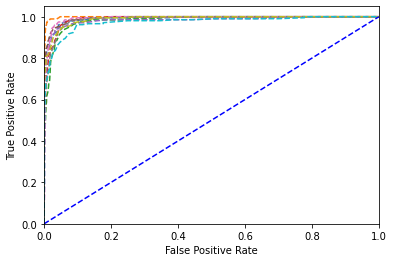

In [ ]:
w4 = rfc1.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w4[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

LDA

In [184]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x_train,y_train)
x_train5= lda.transform(x_train)
x_test5= lda.transform(x_test)

In [185]:
model4 = rfc()
model4.fit(x_train5, y_train)
y_pred4 = model4.predict(x_test5)
accu4=ac(y_test,y_pred4)
print(accu4)

0.4319319319319319


PCA

In [179]:
P4 = rfc()
P4.fit(x2_train, y_train)

RandomForestClassifier()

In [180]:
Q4 = P4.predict(x2_test)

In [181]:
print(ac(y_test, Q4))

0.42292292292292294


In [200]:
l4 = ['Random Forest Classifier', ac(y_test, rfc_y1), ac(y_test, Q4), ac(y_test,y_pred4)]
table.append(l4)

#**5.Decision Tree**

In [ ]:
dtc1 = dtc()
dtc1.fit(x_train, y_train)
dtc_y1 = dtc1.predict(x_test)

In [ ]:
print(ac(y_test, dtc_y1))

0.6751751751751752


In [ ]:
print(confusion_matrix(y_test, dtc_y1))

[[134   2  26   8   4   6   8   1   6   6]
 [  1 167   4   1   0   6   0   1   3   2]
 [ 12   5 100  11   3  26   5   9   7  14]
 [ 11   1   5 124   8   3  12   6  10  13]
 [  5   0   6  14 128   2  10  15  16   9]
 [  8  13  16   3   3 147   0   8   4   7]
 [  5   0   3   4   8   4 156   1   4  12]
 [  0   1  11  16  11   2   0 144   8  10]
 [ 12   1   6   9  14   2   2  10 139  10]
 [ 15   3  16  19   8   5  21   4   7 110]]


In [ ]:
print(classification_report(y_test, dtc_y1))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       201
           1       0.87      0.90      0.88       185
           2       0.52      0.52      0.52       192
           3       0.59      0.64      0.62       193
           4       0.68      0.62      0.65       205
           5       0.72      0.70      0.71       209
           6       0.73      0.79      0.76       197
           7       0.72      0.71      0.72       203
           8       0.68      0.68      0.68       205
           9       0.57      0.53      0.55       208

    accuracy                           0.68      1998
   macro avg       0.67      0.68      0.68      1998
weighted avg       0.67      0.68      0.67      1998



In [ ]:
depth_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sample_len = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
para = {'max_depth' : depth_range, 'min_samples_leaf': sample_len}
m1 =  dtc()
gscv = GridSearchCV(m1, para, cv = 5)
gscv.fit(x_train, y_train)
gscv.best_params_

{'max_depth': 15, 'min_samples_leaf': 2}

In [ ]:
model2= dtc(max_depth= 15, min_samples_leaf= 2)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
accu2=ac(y_test,y_pred2)
print(accu2)

0.6676676676676677


ROC

Text(0.5, 0, 'False Positive Rate')

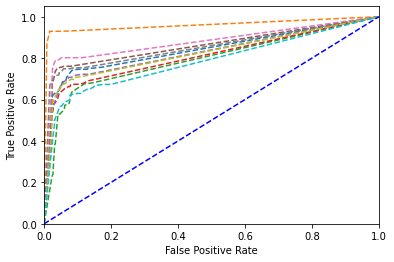

In [ ]:
w5 = model2.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w5[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x_train,y_train)
X_train_2= lda.transform(x_train)
X_test_2= lda.transform(x_test)

In [ ]:
model_4 = dtc()
model_4.fit(X_train_2, y_train)
y_pred_4 = model_4.predict(X_test_2)

In [ ]:
accu_3=ac(y_test,y_pred_4)
print(accu_3)

0.37487487487487486


PCA

In [186]:
P5 = dtc()
P5.fit(x2_train, y_train)

DecisionTreeClassifier()

In [187]:
Q5 = P5.predict(x2_test)

In [188]:
print(ac(y_test, Q5))

0.2822822822822823


In [201]:
l5 = ['Decision Tree Classifier', ac(y_test, dtc_y1), ac(y_test, Q5), ac(y_test,y_pred_4)]
table.append(l5)

#**6.MLP**

In [189]:
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [190]:
mlp=MLPClassifier(max_iter=500, activation="relu")
mlp.fit(x1_train, y_train)

y_pred5 = mlp.predict(x1_test)

In [ ]:
accu5=ac(y_test,y_pred5)
print(accu5)

0.8563563563563563


In [ ]:
confusion_matrix(y_test,y_pred5) 

array([[172,   0,   6,   2,   2,   5,   4,   1,   2,   7],
       [  1, 169,   3,   0,   0,  11,   1,   0,   0,   0],
       [ 11,   2, 159,   3,   1,   6,   1,   2,   2,   5],
       [  2,   0,   8, 160,   9,   1,   2,   5,   2,   4],
       [  3,   1,   1,   6, 171,   0,   2,   5,  11,   5],
       [  4,   6,   8,   2,   3, 181,   0,   0,   1,   4],
       [  1,   0,   0,   1,   4,   0, 181,   0,   0,  10],
       [  1,   1,   4,  12,   7,   0,   0, 166,   6,   6],
       [  6,   0,   4,   2,   3,   5,   1,   5, 177,   2],
       [  5,   2,   1,   7,   1,   4,   3,   2,   8, 175]])

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       201
           1       0.93      0.91      0.92       185
           2       0.82      0.83      0.82       192
           3       0.82      0.83      0.82       193
           4       0.85      0.83      0.84       205
           5       0.85      0.87      0.86       209
           6       0.93      0.92      0.92       197
           7       0.89      0.82      0.85       203
           8       0.85      0.86      0.86       205
           9       0.80      0.84      0.82       208

    accuracy                           0.86      1998
   macro avg       0.86      0.86      0.86      1998
weighted avg       0.86      0.86      0.86      1998



ROC

Text(0.5, 0, 'False Positive Rate')

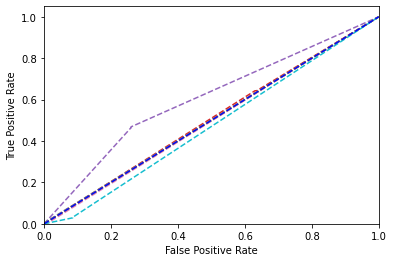

In [ ]:
w6 = mlp.predict_proba(x_test)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

label = np.unique(y_test)
n_classes = label.shape[0]
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:, i], w6[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], linestyle = '--', label = '%s vs rest (AUC = %0.2f)' % (label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(x1_train,y_train)
X_train_3= lda.transform(x_train)
X_test_3= lda.transform(x_test)

In [ ]:
model_6 = LDA()
model_6.fit(X_train_3, y_train)
y_pred_6 = model_6.predict(X_test_3)

In [ ]:
accu_6=ac(y_test,y_pred_6)
print(accu_6)

0.2932932932932933


PCA

In [191]:
P6 = MLPClassifier()
P6.fit(x2_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [192]:
Q6 = P6.predict(x2_test)

In [193]:
print(ac(y_test, Q6))

0.29179179179179177


In [202]:
l6 = ['MLP', ac(y_test,y_pred5), ac(y_test, Q6), ac(y_test,y_pred_6)]
table.append(l6)

**Accuracy on Testing data**

In [207]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════╤════════════════╤════════════╤════════════╕
│ Model                    │   Simple model │   With PCA │   With LDA │
╞══════════════════════════╪════════════════╪════════════╪════════════╡
│ Lightgbm Classfier       │       0.8999   │   0.428428 │   0.446947 │
├──────────────────────────┼────────────────┼────────────┼────────────┤
│ Xgboost Classifier       │       0.803303 │   0.432432 │   0.446947 │
├──────────────────────────┼────────────────┼────────────┼────────────┤
│ KNN Classifier           │       0.896897 │   0.383884 │   0.446947 │
├──────────────────────────┼────────────────┼────────────┼────────────┤
│ Random Forest Classifier │       0.862362 │   0.422923 │   0.431932 │
├──────────────────────────┼────────────────┼────────────┼────────────┤
│ Decision Tree Classifier │       0.675175 │   0.282282 │   0.374875 │
├──────────────────────────┼────────────────┼────────────┼────────────┤
│ MLP                      │       0.862863 │   0.291792 │   0.2